**IMPORTING THE NECESSARY LIBRARIES**

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
%matplotlib inline

**DOWLOADING THE DATASET**

In [67]:
df=pd.read_csv("/content/spam.csv", encoding='latin1')

In [23]:
#Viewing the Head Portion of the Dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
#Viewing the Tail Portion of the Dataset
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**DATA PREPROCESSING**

In [25]:
#Drop the Unnecessary Columms
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [26]:
#Renaming the Columns
df.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [27]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_2.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('text')

In [70]:
# Clean the text data
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.replace("[^a-zA-Z0-9 ]", "")

**FEATURE EXTRACTION**

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example dataset
df=pd.read_csv("/content/spam.csv", encoding='latin1')
labels = [1, 0, 0, 1, 0, 1]  # 1 for spam, 0 for non-spam

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to top 5000

# Fit and transform the text data to TF-IDF features
X_features = tfidf_vectorizer.fit_transform(df).toarray()
y_labels = labels

In [73]:
# Print the shape of the feature matrix
print("Shape of feature matrix:", X_features.shape)

Shape of feature matrix: (5, 3)


**SPLIT THE DATASET**

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)


**MODEL TRAINING**

**NAIVE BAYESIAN METHOD**

In [41]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to top 5000

# Fit and transform the text data to TF-IDF features
X_features = tfidf_vectorizer.fit_transform(X).toarray()

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.78      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



**VISUALIZATION OF THE TRAINED MODEL-NAIVE BAYESIAN**

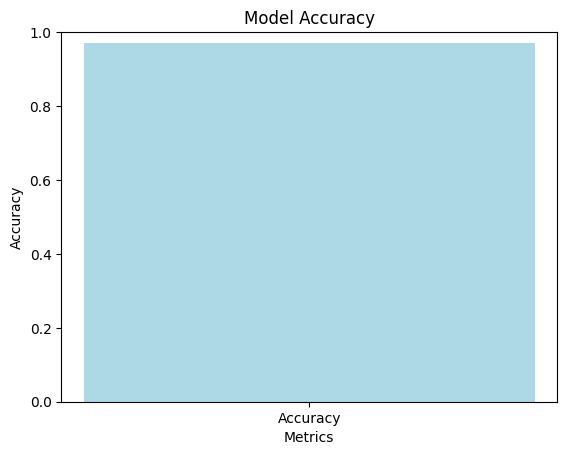

In [57]:
accuracy = nb_classifier.score(X_test, y_test)
plt.bar(['Accuracy'], [accuracy], color=['lightblue'])
plt.title('Model Accuracy')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**SUPPORT VECTOR MACHINE METHOD**

In [43]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel is commonly used for text classification

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [58]:
svm_classifier.fit(X_train, y_train)

SVC()

In [59]:
accuracy = svm_classifier.score(X_test, y_test)

**VISUALISING THE SVM MODEL**

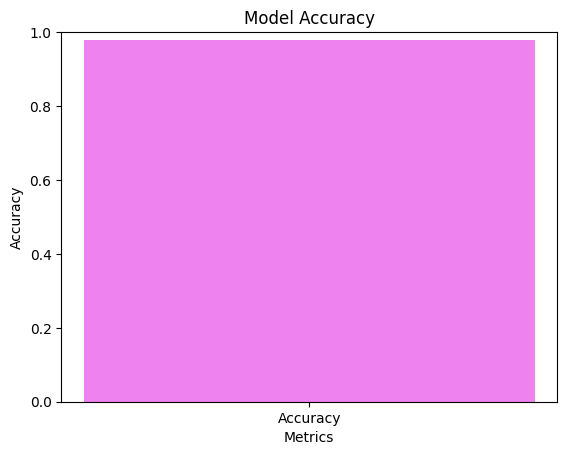

In [63]:
accuracy = svm_classifier.score(X_test, y_test)
plt.bar(['Accuracy'], [accuracy], color=['violet'])
plt.title('Model Accuracy')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**VISUALIZATION THROUGH CONFUSION MATRIX**

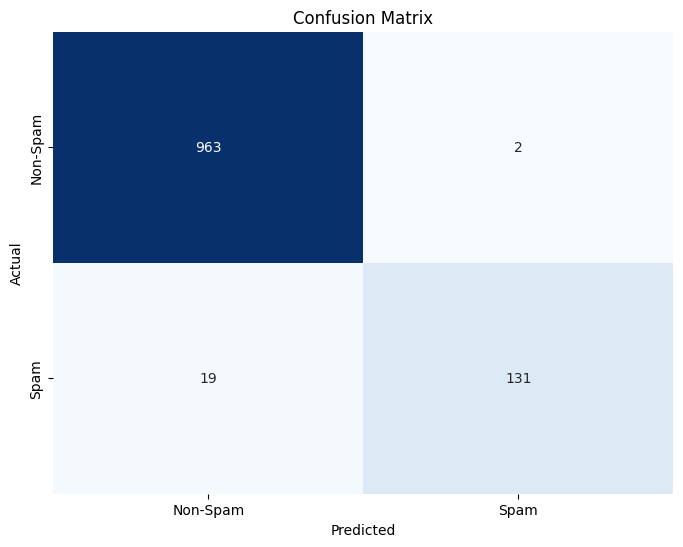

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**VISUALIZATION OF 30 COMMON WORDS IN MESSAGE**

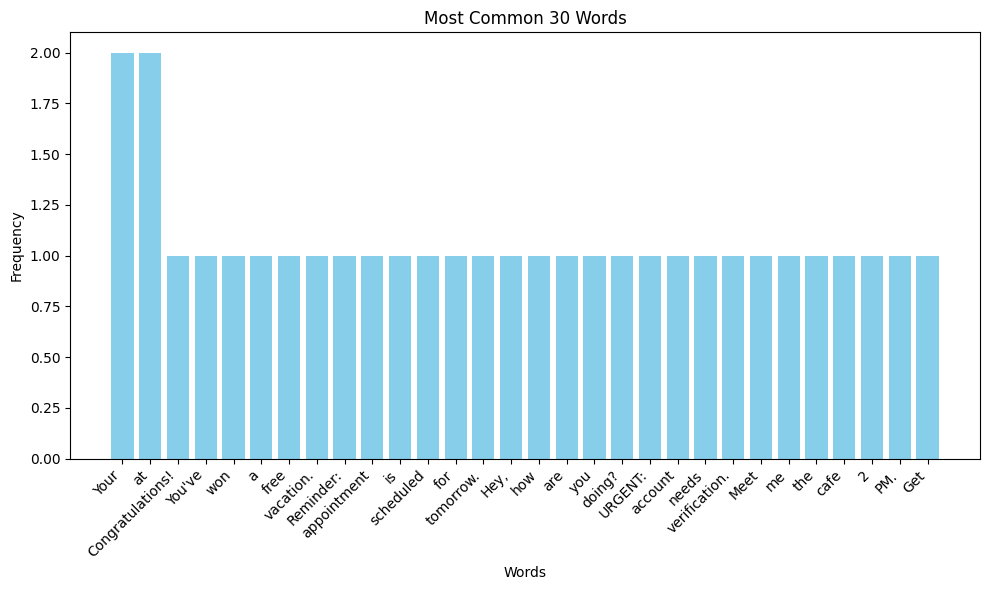

In [68]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Example dataset
df=pd.read_csv("/content/spam.csv", encoding='latin1')

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Combine all text into a single string
all_text = ' '.join(df['text'])

# Tokenize the combined text
tokens = all_text.split()

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common 30 words
most_common_words = word_counts.most_common(30)

# Extract words and frequencies for visualization
words = [word[0] for word in most_common_words]
frequencies = [word[1] for word in most_common_words]

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Most Common 30 Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
